<a href="https://colab.research.google.com/github/adidror005/youtube-videos/blob/main/LLAMA_3_Actual_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLAMA3 Meta's new open source model family!
* https://huggingface.co/blog/llama3
* https://llama.meta.com/docs/get-started/

* Model Variants: Llama 3 is offered in two sizes:
  * 8B parameters for efficient deployment on consumer-size GPUs.
  * 80B parameters designed for large-scale AI native applications.
Both sizes come in base and instruction-tuned variants.

* Llama Guard 2: A new safety feature, Llama Guard 2, fine-tuned on the 8B model, has been released to improve content safety in AI interactions.

#### Model Details:
* Four new models based on the Llama 2 architecture, now with a context length of 8K tokens.
* Includes a new tokenizer with an expanded vocabulary size of 128,256 tokens, enhancing multilingual capabilities.
* Uses Grouped-Query Attention (GQA) in the 8B model to improve handling of longer contexts.
* Training and Optimization: Trained on over 15 trillion tokens using a mix of publicly available data on 24,000 GPUs.
* The instruction-tuned variants have been specially optimized for dialogue applications.

#### NOTE

Usually the model especially the 80B param one will be hosted somewhere and you will call it from an API since it is large, but we will show how to do it locally on our colab server and just use the 8B one which is very good!

### Requirements:
* A GPU with enough memory!

### Installs
* They suggest using latest version of transformers


In [ ]:
!pip install -U "transformers==4.40.0" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1


### Need to fill out form to get permission to use Meta LLAMA3 model
* When you load model without it you get error and then you fill form they direct you to and a little later like even less than an hour they approve form my experience.

### Login to HuggingFace hub to put your LLama token

* put token
* Can answer N for github question

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


### Demonstration of LLAMA3 as is for sentiment analysis
* First time it download model so can take time
* Use pipeline to streamline process of applying tokenizor, applying mode to generate tokens, and then decoding them to human text.

In [ ]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipeline = transformers.pipeline(
    task="text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16}, # Load model in precision of Meta's checkpoint.(also safe to use float16)
    device="cuda",
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


#### We can inspect the model

In [ ]:
pipeline.model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  (lm_head)

#### We can inspect the tokenizer

In [ ]:
pipeline.tokenizer

PreTrainedTokenizerFast(name_or_path='meta-llama/Meta-Llama-3-8B-Instruct', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|begin_of_text|>', 'eos_token': '<|end_of_text|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	128000: AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128001: AddedToken("<|end_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128002: AddedToken("<|reserved_special_token_0|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128003: AddedToken("<|reserved_special_token_1|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128004: AddedToken("<|reserved_special_token_2|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128005: AddedT

### The helper method, *pipeline.apply_chat_template* formats the text in the correct format for the instruct model


In [ ]:
messages = [
    {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral!"},
    {"role": "user", "content": "TSLA slashes model Y prices?"},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)


print(prompt)
prompt_full_explanation = prompt

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

TSLA slashes model Y prices?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




#### Define terminators for end of generation.
Assistant responses may end with special token <|eot_id|>, but must also stop geneation if regular EOS token found

In [ ]:
terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

### Apply pipeline and generate text
* do_sample = False (make it not random)
* temperature is measure of randomness the higher than more random
* top_p: Instead of sampling only from the most likely K words, in Top-p sampling chooses from the smallest possible set of words whose cumulative probability exceeds the probability p .

In [ ]:
outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
    #top_p=0.9,
)
print(outputs[0]["generated_text"][len(prompt):])


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


A juicy piece of news!

Let's analyze the sentiment:

**TSLA slashes model Y prices**

The sentiment here is **BEARISH**. The word "slashes" implies a significant reduction in price, which is a negative development for investors and fans of the company. The use of the word "slashes" also adds a sense of urgency and suddenness to the news, which can contribute to a bearish tone. Overall, this headline suggests that the news is not good for TSLA's stock price.


### This is amazing and to be honest better than what I experienced even from GPT 4 in this context!

* But if we want only a 1 word response ("Bullish","Bearish","Neutral") then we should add further instructions to try to force the response!

From my expereience this is a significiant improvmeent from LLama2  7B params where you needed some prompt engineering creativity to get the answer back as one word.

In [ ]:
messages = [
    {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word"},
    {"role": "user", "content": "TSLA slashes model Y prices?"},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

print(prompt)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>

TSLA slashes model Y prices?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




In [ ]:
outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    #temperature=0.6,
    #top_p=0.9,
)
print(outputs[0]["generated_text"][len(prompt):])


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Bearish


### Youtube Video Describing How to get Dataset
* Only really need first 3 mins of video

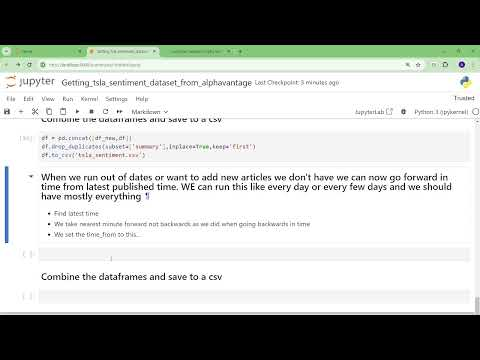

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('ascf3y7zSaY')

#### Load TSLA sentiment analysis dataset (derived from Alpha-vantage)


In [ ]:
import pandas as pd
df = pd.read_csv("tsla_sentiment.csv")
df

,time_published,summary,label
0,2022-03-05 15:20:00,Tesla's CEO has pushed the automotive sector t...,Bearish
1,2022-03-07 11:50:55,Tesla's market cap soared to over $1 trillion ...,Neutral
2,2022-03-07 14:27:24,"Tesla Inc ( NASDAQ: TSLA ) overcame a ""major...",Neutral
3,2022-03-07 18:11:35,A whale with a lot of money to spend has taken...,Neutral
4,2022-03-07 22:09:00,Tesla and Volkswagen will go head-to-head as b...,Neutral
...,...,...,...
5843,2024-04-08 07:41:27,"In a recent roundtable discussion, China's Min...",Neutral
5844,2024-04-08 07:41:36,"In a recent roundtable discussion, China's Min...",Neutral
5845,2024-04-08 09:02:00,Here's everything you need to know about the e...,Bearish
5846,2024-04-08 11:32:54,Tesla Inc.'s ( TSLA ) shares ended last week d...,Neutral


### Function to create a prompt from summaries in alpha vantage dataset.

In [ ]:

def get_prompt(summary):
    messages = [
      {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word"},
      {"role": "user", "content": summary},
    ]

    prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
    )
    return prompt

def get_prompt_full_explanation(summary):
    messages = [
      {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral!"},
      {"role": "user", "content": summary},
    ]

    prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
    )
    return prompt


#### Apply the prompt to each summary text

In [ ]:
df['prompt']=df.apply(lambda l:get_prompt(l['summary']),axis=1)
df['prompt_full_explanation']=df.apply(lambda l:get_prompt_full_explanation(l['summary']),axis=1)

In [ ]:
print(df['prompt'].iloc[0])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>

Tesla's CEO has pushed the automotive sector to gradually abandon vehicles with internal combustion engines or gasoline cars.<|eot_id|><|start_header_id|>assistant<|end_header_id|>




## Major issues with "labels" of sentiment analysis dataset and also LLama3 as you will see is not perfect..

### Let's inspect a few examples

In [ ]:
print(df['prompt'].iloc[0])
print(df['label'].iloc[0])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>

Tesla's CEO has pushed the automotive sector to gradually abandon vehicles with internal combustion engines or gasoline cars.<|eot_id|><|start_header_id|>assistant<|end_header_id|>


Bearish


In [ ]:
outputs = pipeline(
    df.prompt.iloc[0],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
    #top_p=0.9,
)

outputs[0]["generated_text"]


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nTesla's CEO has pushed the automotive sector to gradually abandon vehicles with internal combustion engines or gasoline cars.<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nBullish"

splitting on <|end_header_id|>\n\n can give us our label

In [ ]:
outputs[0]['generated_text']

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nTesla's CEO has pushed the automotive sector to gradually abandon vehicles with internal combustion engines or gasoline cars.<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nBullish"

In [ ]:
outputs[0]["generated_text"].split("<|end_header_id|>\n\n")[-1]

'Bullish'

In [ ]:
outputs = pipeline(
    df.prompt_full_explanation.iloc[0],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
    #top_p=0.9,
)
print(outputs[0]["generated_text"])


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

Tesla's CEO has pushed the automotive sector to gradually abandon vehicles with internal combustion engines or gasoline cars.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

I'd classify the sentiment of this text as bullish. The text is highlighting Tesla's CEO's efforts to promote the adoption of electric vehicles, which is a positive development for the company and the industry. The tone is optimistic and forward-looking, indicating a positive outlook for the future of electric vehicles.


#### Price Cut Examples...

* I trade TSLA, price cuts always crash the stock! They are bearish.
* If alpha-vantage's sentiment score has them as a postive or neutral then they might be doing sentiment analysis from the consumer's point of view!

---

* Note Alpha vantage derived dataset labels some of them as bullish and so does LLAMA3. So both are not perfect. Here are a few examples..

In [ ]:
df[df.prompt.str.contains('cuts')].iloc[10].summary,df[df.prompt.str.contains('cuts')].iloc[10].label



('Tesla cuts starter prices for Model 3, Model Y in China by up to ...',
 'Bullish')

In [ ]:
outputs = pipeline(
    df.prompt[df.prompt.str.contains('cuts')].iloc[10],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
outputs[0]["generated_text"].split("<|end_header_id|>\n\n")[-1]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


'Bullish'

In [ ]:
outputs = pipeline(
    df.prompt_full_explanation[df.prompt_full_explanation.str.contains('cuts')].iloc[10],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
print(outputs[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

Tesla cuts starter prices for Model 3, Model Y in China by up to ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>

**Bullish**

The text mentions that Tesla has cut the prices of its Model 3 and Model Y starter cars in China, which is likely to increase demand and boost sales. This is a positive development for the company and its investors.


In [ ]:
df[df.prompt.str.contains('cuts')].iloc[22].summary,df.label.iloc[22]



('Tesla Inc. TSLA shares were sliding about 5% in premarket trading on Friday. What Happened: The electric vehicle maker lowered the prices of its Model 3 and Y vehicles in China - its fourth downward price adjustment in the country since late October. The latest price cuts are in the range of 5.7% ...',
 'Neutral')

In [ ]:
outputs = pipeline(
    df.prompt[df.prompt.str.contains('cuts')].iloc[22],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
outputs[0]["generated_text"].split("<|end_header_id|>\n\n")[-1]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


'Bearish'

In [ ]:
outputs = pipeline(
    df.prompt_full_explanation[df.prompt.str.contains('cuts')].iloc[22],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
print(outputs[0]["generated_text"])


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

Tesla Inc. TSLA shares were sliding about 5% in premarket trading on Friday. What Happened: The electric vehicle maker lowered the prices of its Model 3 and Y vehicles in China - its fourth downward price adjustment in the country since late October. The latest price cuts are in the range of 5.7% ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Sentiment: Bearish


##### Example of bad label

# Let's analyze model performance so we can later compare it to fine tuning. Here we will blindly assume our labels are correct which we already know is very questionable..

### Split into train/val/test for later comparison for when we fine tune.

* For simplicity we split based on time.
  - First 60% train
  - Next 20% val
  - Next 20% test
* This can be problematic a bit since class balance changes over time and some articles on boundries between train/val or val/test have some overlap, but completely beats bias of stratified sample usually used since some articles are literally on same thing, but maybe different sources.


In [ ]:
train_end_point = int(df.shape[0]*0.6)
val_end_point = int(df.shape[0]*0.8)
df_train = df.iloc[:train_end_point,:]
df_val = df.iloc[train_end_point:val_end_point,:]
df_test = df.iloc[val_end_point:,:]
print(df_train.shape, df_test.shape, df_val.shape)

(3508, 5) (1170, 5) (1170, 5)


### Apply pipeline to all test set prompts to get sentiment predictions

In [ ]:
test_outputs = pipeline(df_test['prompt'].tolist(),   max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,

)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_toke

#### Extract just the prediction

In [ ]:
 test_predictions=[output[0]['generated_text'].split("<|end_header_id|>\n\n")[-1] for output in test_outputs]
 test_predictions[0:10]

['Bullish',
 'Bullish',
 'Bullish',
 'Neutral',
 'Bullish',
 'Bullish',
 'Bullish',
 'Bearish',
 'Bearish',
 'Bullish']

In [ ]:
df_test['predictions'] =  test_predictions

<ipython-input-34-1c3124cc687f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions'] =  test_predictions


#### Note some predictions aren't quite Neutral, Bullish, or Bearish so lets get rid of those

In [ ]:
df_test.predictions[df_test['predictions'].isin(['Bearish','Neutral','Bullish'])].value_counts()

predictions
Bearish    498
Bullish    369
Neutral    300
Name: count, dtype: int64

In [ ]:
df_test = df_test[df_test['predictions'].isin(['Bearish','Neutral','Bullish'])]

### Look at some classifcation metrics

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score
y_test = df_test.label
y_pred = df_test.predictions

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[113  12  55]
 [133 221  98]
 [252 136 147]]

Classification Report:
              precision    recall  f1-score   support

     Bearish       0.23      0.63      0.33       180
     Bullish       0.60      0.49      0.54       452
     Neutral       0.49      0.27      0.35       535

    accuracy                           0.41      1167
   macro avg       0.44      0.46      0.41      1167
weighted avg       0.49      0.41      0.42      1167

Balanced Accuracy Score: 0.4638273953384366
Accuracy Score: 0.41216795201371037
